# Walmart

Fokus utama pada project ini adalah untuk memprediksi pejualan toko dalam satu minggu dengan menggunakan data dari 45 cabang toko Walmart. Dataset memiliki beberapa atribut yang menjadi variabel dependen yang mempengaruhi penjualan dalam seminggu. Langkah utama adalah melakukan analisis terhadap faktor-faktor yang mempengaruhi penjualan dalam seminggu. Selanjutnya Feature engineering yang dapat dilakukan meliputi memecah kolom ‘Date’ ke dalam 4 kolom baru yaitu Date, Day, Month, Year. Berikutnya akan lebih baik jika dapat mengamati penjualan dalam hari khusus seperti libur lebaran (holidays) pada penjualan.

## Data Processing

Langkah pertama dalam memproses data ini adalah dengan melakukan import data "Walmart.csv". Selanjutnya adalah mengamati data dari jumlah kolom dan jumlah baris data. Penting untuk melihat info data agar mengetahui type-type data dan data yang bernilai null atau missing value. Jika ada data yang type nya tidak sesuai maka harus diperbaiki, dan jika ada data yang null atau missing value maka harus dilakukan handling missing value. Pastikan juga tidak ada data yang duplicate.

#### Importing library and CSV file

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

from sklearn.linear_model import LinearRegression

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline


# import metrics
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('Walmart.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

#### Melihat info dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Terdapat 8 kolom dan 6435 row data. Ada 7 data numeric dan 1 data object pada data tanggal. Data tanggal yang masih dalam bentuk object harus diperbaiki ke type datetime dan pecahlah data kolom Date menjadi 4 bagian yaitu day, date, month, and year.

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['day'], df['date'], df['month'], df['year'] = df['Date'].dt.strftime('%A'), df['Date'].dt.day, df['Date'].dt.strftime('%B'), df['Date'].dt.year
df.head()

c:\Users\WIN-10\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\WIN-10\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\WIN-10\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\WIN-10\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or sp

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment       day  date     month  year  
0  211.096358         8.106    Sunday     2       May  2010  
1  211.242170         8.106  Thursday     2  December  2010  
2  211.289143         8.106    Friday    19  February  2010  
3  211.319643         8.106    Friday    26  February  2010  
4  211.350143         8.106    Monday     3       May  2010

Data tanggal yang semula type object sudah diperbaiki menjadi type datetime. Terdapat pesan error untuk melakukan setting tanggal dengan menggunakan format spesifik tetapi error ini dapat dihilangkan dengan errors coerce.

In [5]:
df.Store = pd.Categorical(df.Store)

data pada Store harus diubah dari numerik ke kategori karena value dari kolom ini menunjukan penomoran yang mewakili nama dari cabang Store bukan kuantitas numerik

In [6]:
df.Holiday_Flag = pd.Categorical(df.Holiday_Flag)

Data pada Holiday_Flag harus diubah dari numerik ke kategori atau Boolean. 1 untuk Holiday dan 0 untuk non Holiday.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day           6435 non-null   object        
 9   date          6435 non-null   int64         
 10  month         6435 non-null   object        
 11  year          6435 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 516.9+ KB


#### Mendeskripsikan Dataset 

In [8]:
df[["Weekly_Sales","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"]].describe().style.background_gradient(cmap = 'RdPu')

Data yang di deskripsikan hanya data numerik. Data Weekly_Sales merupakan target dan Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment merupakan faktor yang mempengaruhi data target.

#### Memeriksa data yang Null dan Missing Value

In [9]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
day             0
date            0
month           0
year            0
dtype: int64

Data tersebut tidak memiliki null atau missing value. Tidak perlu melakukan missing value handling.

#### Memeriksa Jika Terdapat Data Duplicate

In [10]:
df.duplicated().sum()

0

Tidak ada data yang duplicate.

## Data Visualization

Dengan menggunakan visualisasi data dapat dilakukan analisis terhadap data dengan lebih mudah karena data ditampilkan dalam bentuk visual yang membuat pembaca lebih mengerti tentang persebaran data yang ada. Visualisasi data pada data ini menggunakan boxplot, barplot dan histogram.

### Visualisasi Data Categorical

#### Menggunakan Bar Untuk Menghitung Store dengan Weekly_Sales Tertinggi

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

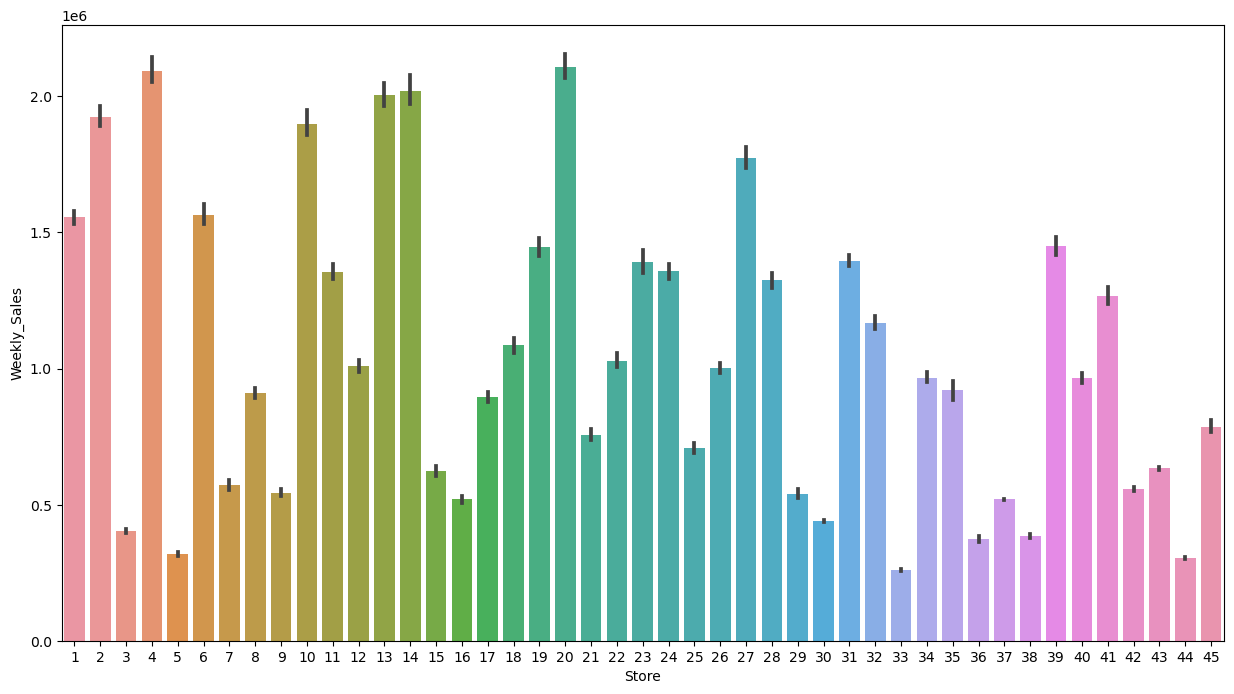

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = 'Store', y = 'Weekly_Sales')

Store yang mencapai penjualan mingguan terbanyak adalah Store 20 dan Store 4.

#### Perbandingan Banyak Data Holiday dan Non-Holiday

<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

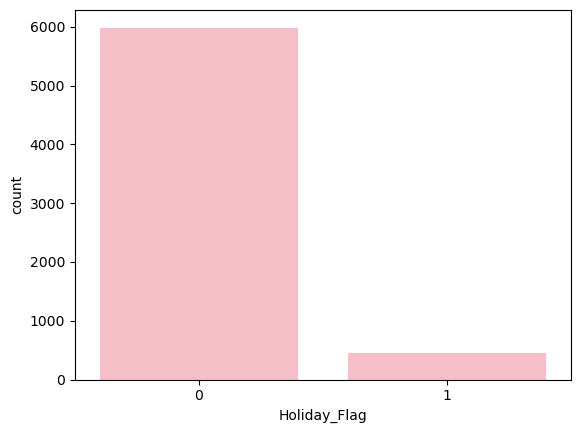

In [12]:
sns.countplot(df['Holiday_Flag'],order=df['Holiday_Flag'].value_counts().index, color='lightpink')

In [13]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

Data Holiday_Flag adalah 450 data dan non-Holiday Flag adalah 5985 data.

#### Perbandingan Weekly_Sales Setiap Store Pada Holiday dan Non-Holiday

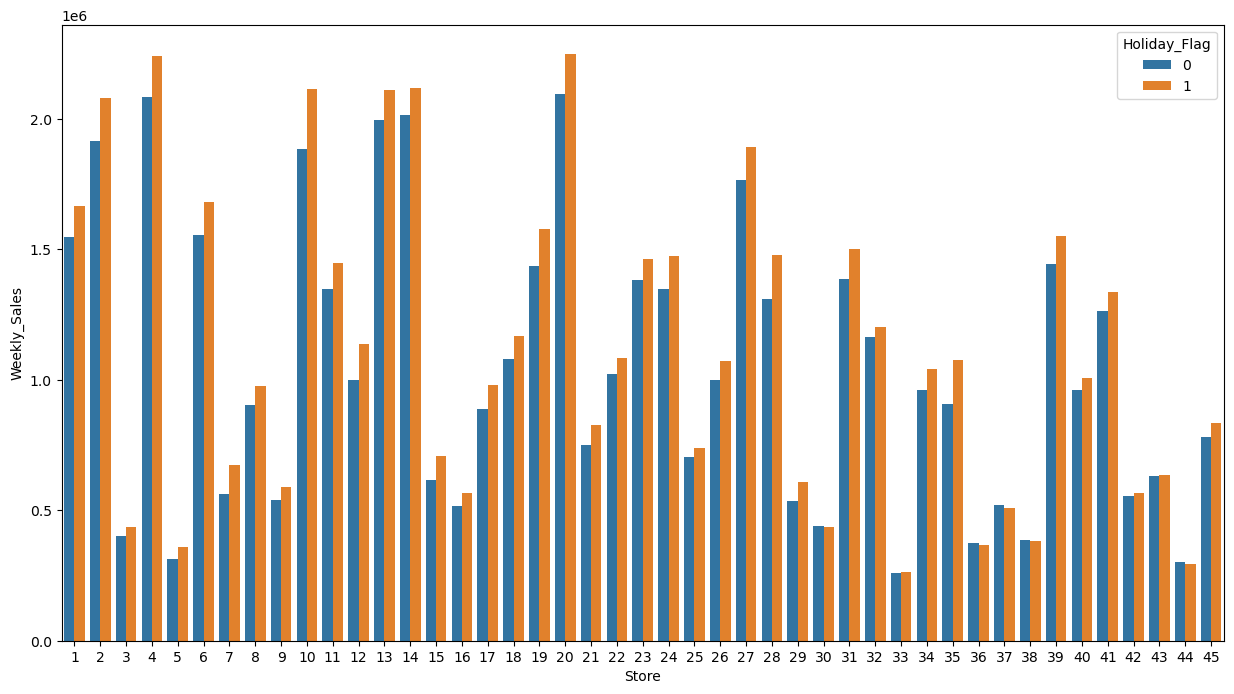

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store',y = 'Weekly_Sales', hue= 'Holiday_Flag', data=df, ci=None)
plt.show()

Holiday_Flag ditandai dengan warna kuning dan non Holiday_Flag ditandai dengan warna biru. Dari data tersebut dapat diliat bahwa Weekly_Sales cendrung lebih tinggi pada Holiday disetiap store. Hal ini dapat menjadi pertimbangan bahwa Holiday_Flag mempengaruhi Weekly_Sales.

#### Membandingkan penjualan tahunan

<AxesSubplot:xlabel='year', ylabel='count'>

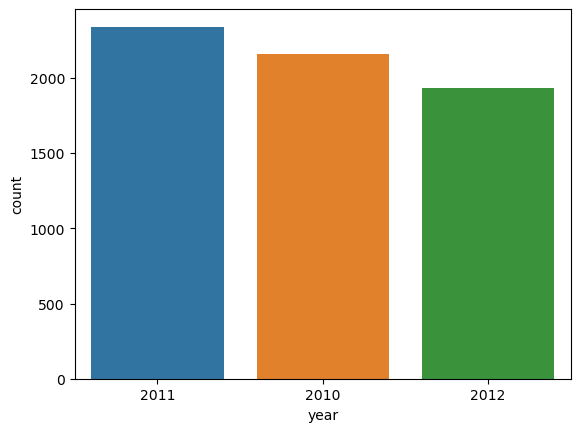

In [15]:
sns.countplot(df['year'],order=df['year'].value_counts().index)

Text(0.5, 1.0, 'Penjualan Tahunan')

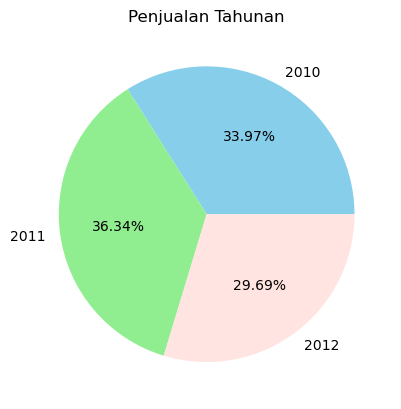

In [16]:
plt.pie(df.groupby('year')['Weekly_Sales'].sum(),labels=df['year'].unique(),normalize=True,autopct='%1.2f%%',colors=['skyblue','lightgreen','mistyrose'])
plt.title('Penjualan Tahunan')

Pada data Walmart data terbanyak adalah data tahun 2011, berikutnya data 2010, dan terakhir data 2012

Berikut adalah perbandingan data Weekly_Sales di tahun 2011, 2010, dan 2013 dalam rentang bulan.

<Figure size 1500x1000 with 0 Axes>

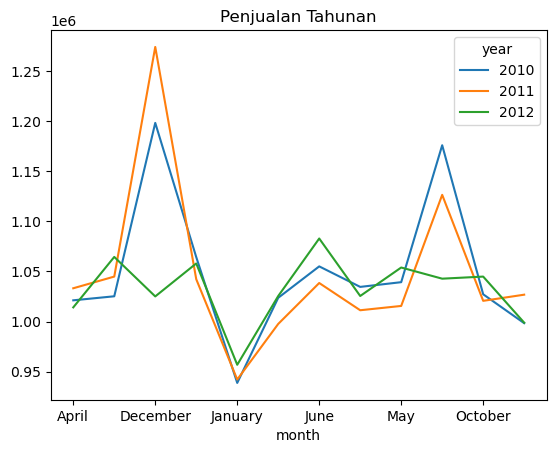

In [17]:
plt.figure(figsize=(15,10))
permonth_sales = pd.pivot_table(df, index = "month", columns = "year", values = "Weekly_Sales")
permonth_sales.plot()
plt.title('Penjualan Tahunan')
plt.show()

In [18]:
df.groupby('year')['Weekly_Sales'].sum()

year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

#### Membandingkan Penjualan Bulanan

<AxesSubplot:xlabel='month', ylabel='count'>

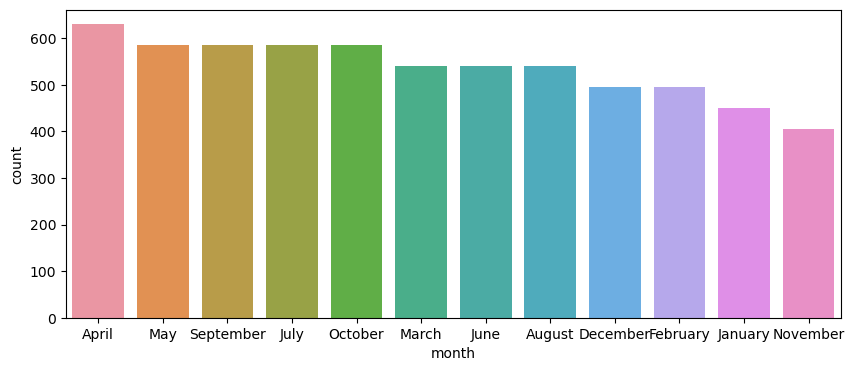

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(df['month'],order=df['month'].value_counts().index,)

Text(0.5, 1.0, 'Penjualan Bulanan')

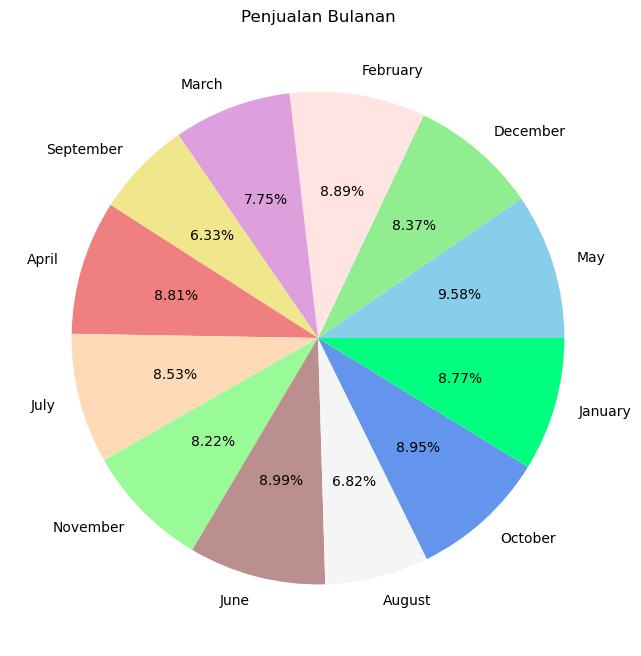

In [20]:
plt.figure(figsize=(10,8))
plt.pie(df.groupby('month')['Weekly_Sales'].sum(),labels=df['month'].unique(),normalize=True,autopct='%1.2f%%',
        colors=['skyblue','lightgreen','mistyrose','plum','khaki','lightcoral','peachpuff','palegreen','rosybrown','whitesmoke','cornflowerblue','springgreen'])
plt.title('Penjualan Bulanan')

Penjualan bulanan terbanyak pada bulan april.

In [21]:
df.groupby('month')['Weekly_Sales'].sum()

month
April        6.453239e+08
August       5.642317e+08
December     5.990761e+08
February     5.220257e+08
January      4.264263e+08
July         5.933139e+08
June         5.750180e+08
March        5.534864e+08
May          6.056966e+08
November     4.591693e+08
October      6.029189e+08
September    5.905323e+08
Name: Weekly_Sales, dtype: float64

#### Membandingkan Penjualan Harian

<AxesSubplot:xlabel='day', ylabel='count'>

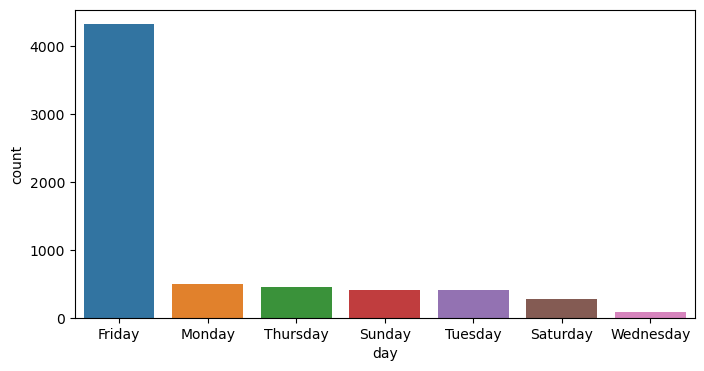

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(df['day'],order=df['day'].value_counts().index,)

Text(0.5, 1.0, 'Penjualan Harian')

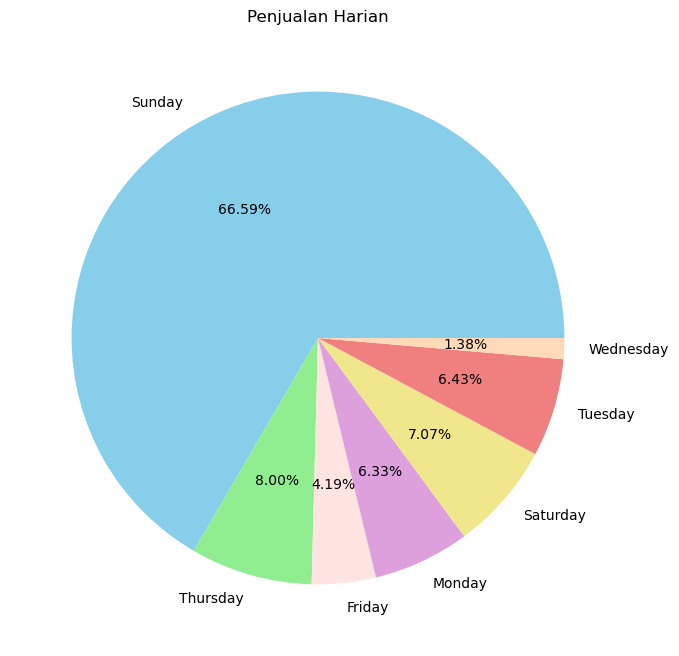

In [23]:
plt.figure(figsize=(10,8))
plt.pie(df.groupby('day')['Weekly_Sales'].sum(),labels=df['day'].unique(),normalize=True,autopct='%1.2f%%',colors=['skyblue','lightgreen','mistyrose','plum','khaki','lightcoral','peachpuff'])
plt.title('Penjualan Harian')

In [24]:
df.groupby('day')['Weekly_Sales'].sum()

day
Friday       4.486257e+09
Monday       5.390133e+08
Saturday     2.824947e+08
Sunday       4.266091e+08
Thursday     4.766244e+08
Tuesday      4.335075e+08
Wednesday    9.271282e+07
Name: Weekly_Sales, dtype: float64

Penjualan Weekly Sales lebih banyak di hari minggu.`

### Visualisasi Data Numerical

#### Visualisasi Data Dengan Histogram

Histogram umumnya digunnakan untuk memvisualisasi data numerik.

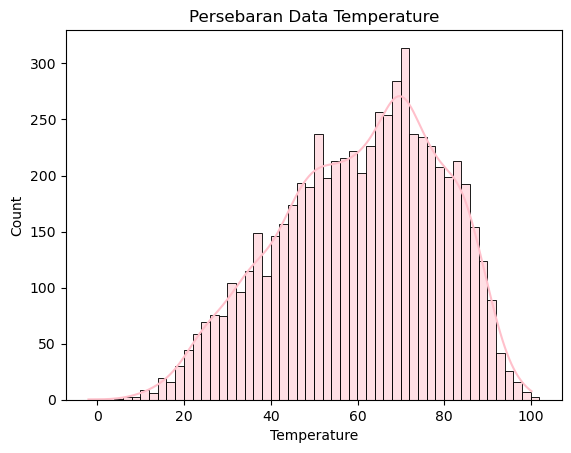

In [25]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='Temperature', binwidth = 2, color = 'pink', kde=True)
plt.title('Persebaran Data Temperature')
plt.show()

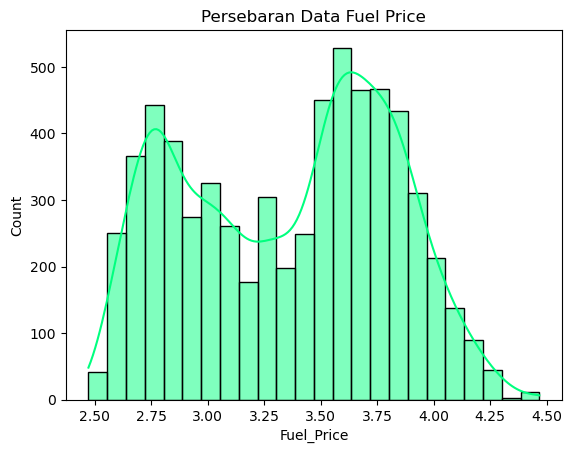

In [26]:
ax = sns.histplot(data = df, x='Fuel_Price', color = 'springgreen', kde=True)
plt.title('Persebaran Data Fuel Price')
plt.show()

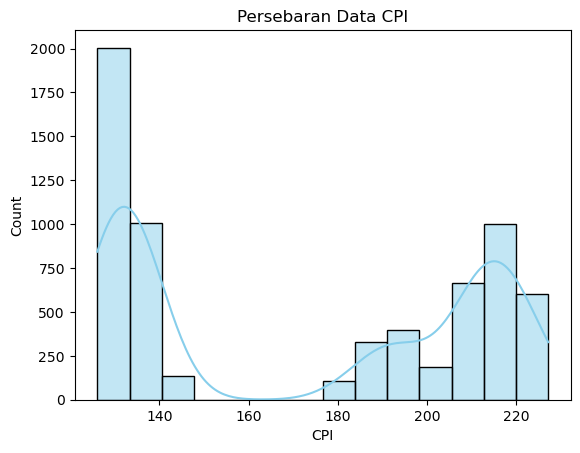

In [27]:
ax = sns.histplot(data = df, x='CPI', color = 'skyblue', kde=True)
plt.title('Persebaran Data CPI')
plt.show()

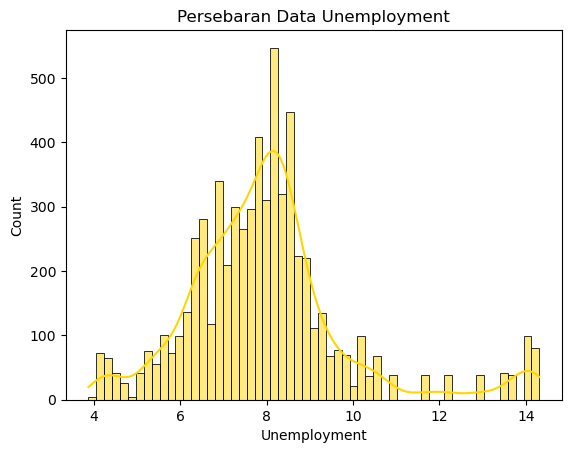

In [28]:
ax = sns.histplot(data = df, x='Unemployment', color = 'gold', kde=True)
plt.title('Persebaran Data Unemployment')
plt.show()

#### Mencari Trend Weekly_Sales

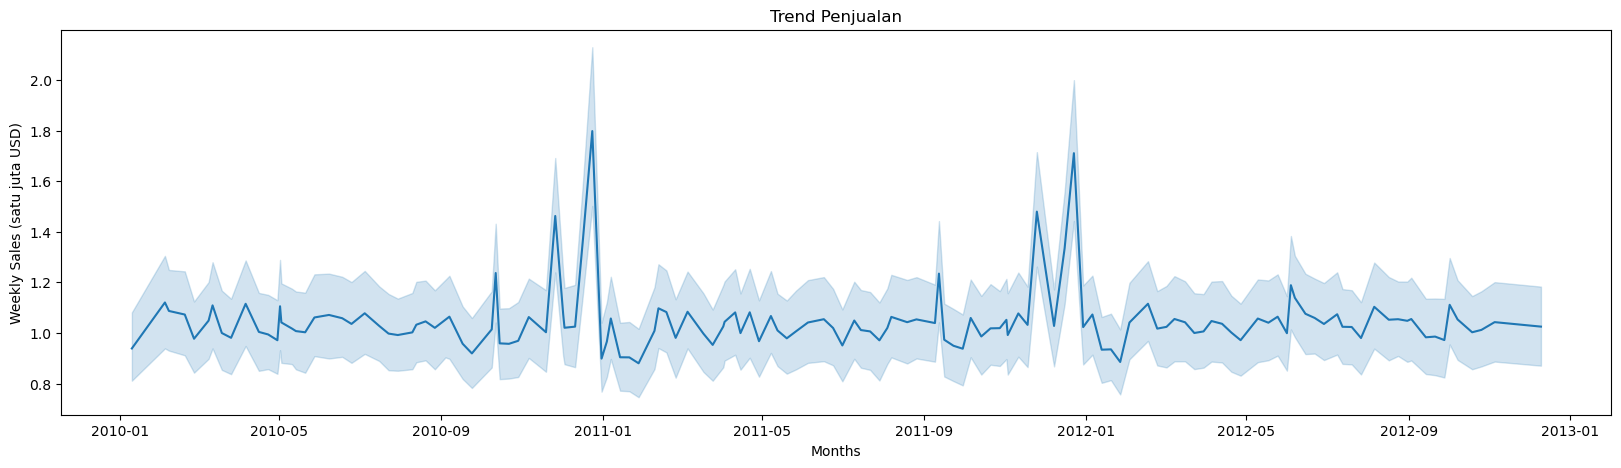

In [29]:
plt.figure(figsize=(20,5))

sns.lineplot(x=df.Date, y=(df.Weekly_Sales/1e6))

plt.xlabel('Months')
plt.ylabel('Weekly Sales (satu juta USD)')
plt.title('Trend Penjualan')


plt.show()

Trend Weekly Sales tertinggi pada bulan November dan Desember untuk tahun 2011 dan 2012.

## Exploratory Data Analysis (EDA)

In [30]:
# Menampilkan data dengan tanggal paling awal
print("Tanggal data awal  :", df.Date.min())

# Menampilkan data dengan tanggal paling akhir
print("Tanggal data akhir :",df.Date.max())

Tanggal data awal  : 2010-01-10 00:00:00
Tanggal data akhir : 2012-12-10 00:00:00


#### Univariat Analysis

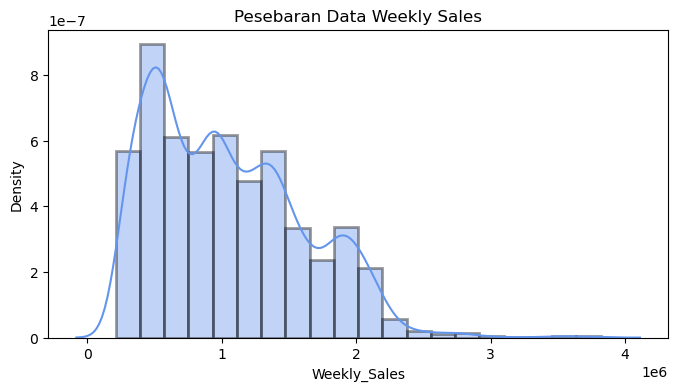

In [31]:
plt.figure(figsize=[8,4])
sns.distplot(df['Weekly_Sales'], color = 'cornflowerblue', hist_kws = dict(edgecolor="black", linewidth=2), bins=20)
plt.title('Pesebaran Data Weekly Sales')
plt.show()

#### Melihat hubungan relasi antar feature dengan feature lainnya

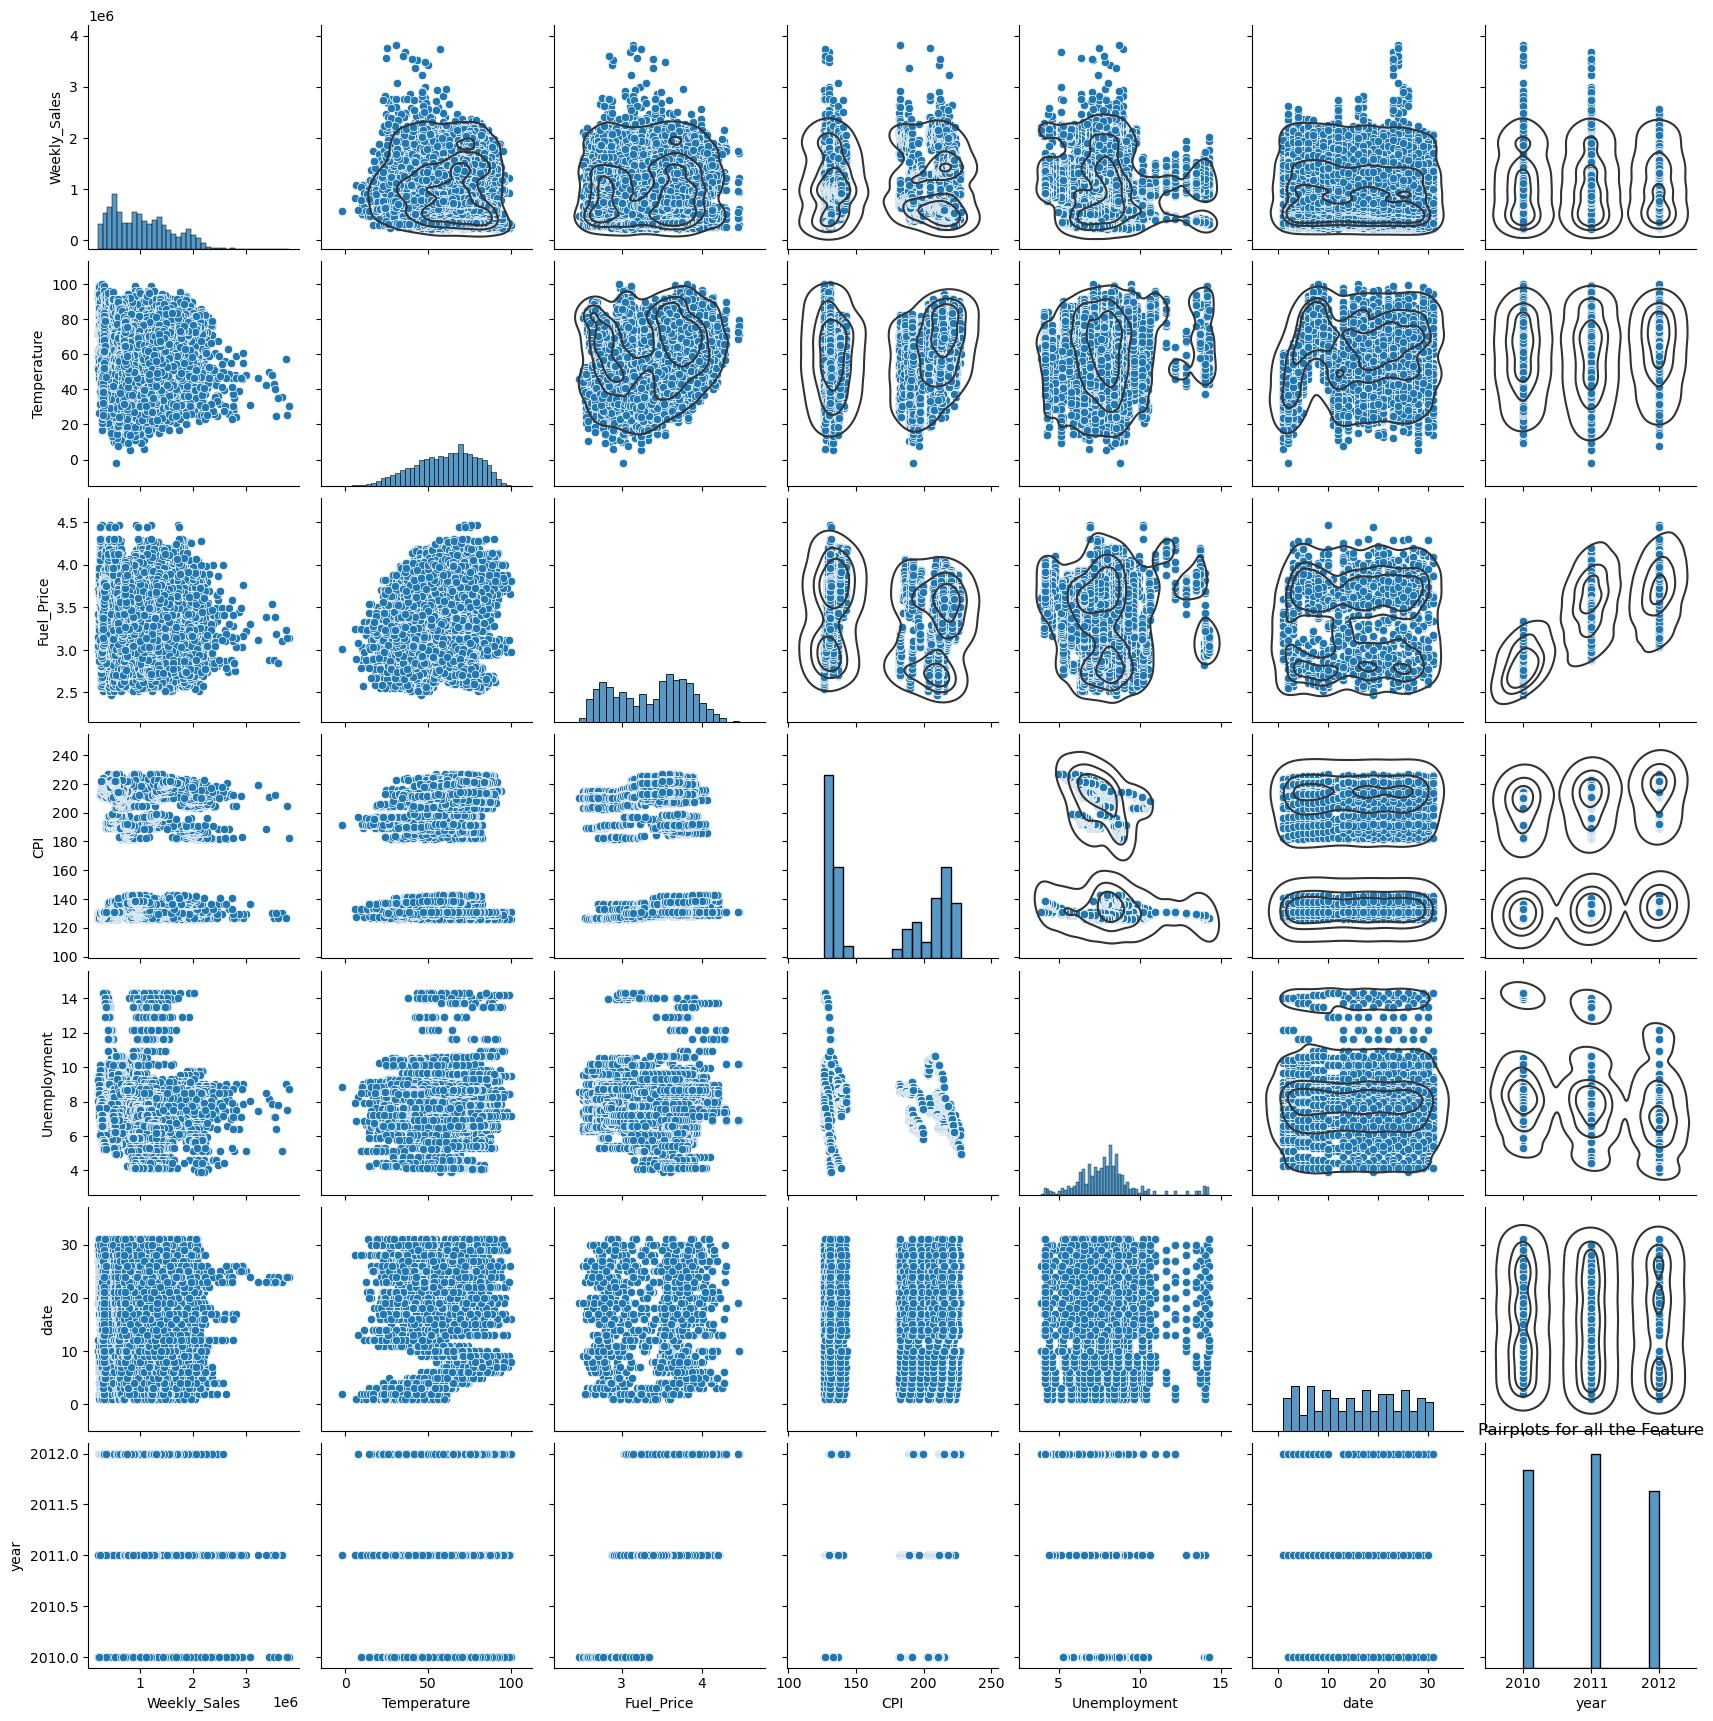

In [32]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

### Data Preparation

#### One Hot Encoding

In [33]:
df_one_hot = pd.get_dummies(df)
df_one_hot

Date  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0    2010-05-02    1643690.90        42.31       2.572  211.096358   
1    2010-12-02    1641957.44        38.51       2.548  211.242170   
2    2010-02-19    1611968.17        39.93       2.514  211.289143   
3    2010-02-26    1409727.59        46.63       2.561  211.319643   
4    2010-05-03    1554806.68        46.50       2.625  211.350143   
...         ...           ...          ...         ...         ...   
6430 2012-09-28     713173.95        64.88       3.997  192.013558   
6431 2012-05-10     733455.07        64.89       3.985  192.170412   
6432 2012-12-10     734464.36        54.47       4.000  192.327265   
6433 2012-10-19     718125.53        56.47       3.969  192.330854   
6434 2012-10-26     760281.43        58.85       3.882  192.308899   

      Unemployment  date  year  Store_1  Store_2  ...  month_December  \
0            8.106     2  2010        1        0  ...               0   
1            8.106     2  2010        1        0  ...               1   
2            8.106    19  2010        1        0  ...               0   
3            8.106    26  2010        1        0  ...               0   
4            8.106     3  2010        1        0  ...               0   
...            ...   ...   ...      ...      ...  ...             ...   
6430         8.684    28  2012        0        0  ...               0   
6431         8.667    10  2012        0        0  ...               0   
6432         8.667    10  2012        0        0  ...               1   
6433         8.667    19  2012        0        0  ...               0   
6434         8.667    26  2012        0        0  ...               0   

      month_February  month_January  month_July  month_June  month_March  \
0                  0              0           0           0            0   
1                  0              0           0           0            0   
2                  1              0           0           0            0   
3                  1              0           0           0            0   
4                  0              0           0           0            0   
...              ...            ...         ...         ...          ...   
6430               0              0           0           0            0   
6431               0              0           0           0            0   
6432               0              0           0           0            0   
6433               0              0           0           0            0   
6434               0              0           0           0            0   

      month_May  month_November  month_October  month_September  
0             1               0              0                0  
1             0               0              0                0  
2             0               0              0                0  
3             0               0              0                0  
4             1               0              0                0  
...         ...             ...            ...              ...  
6430          0               0              0                1  
6431          1               0              0                0  
6432          0               0              0                0  
6433          0               0              1                0  
6434          0               0              1                0  

[6435 rows x 74 columns]

In [34]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6435 non-null   datetime64[ns]
 1   Weekly_Sales     6435 non-null   float64       
 2   Temperature      6435 non-null   float64       
 3   Fuel_Price       6435 non-null   float64       
 4   CPI              6435 non-null   float64       
 5   Unemployment     6435 non-null   float64       
 6   date             6435 non-null   int64         
 7   year             6435 non-null   int64         
 8   Store_1          6435 non-null   uint8         
 9   Store_2          6435 non-null   uint8         
 10  Store_3          6435 non-null   uint8         
 11  Store_4          6435 non-null   uint8         
 12  Store_5          6435 non-null   uint8         
 13  Store_6          6435 non-null   uint8         
 14  Store_7          6435 non-null   uint8  

Karena terdapat beberapa data categorical atau non numerik, maka dilakukan data preparation dengan metode one hot encoding.

#### Menemukan Outlier Data Dengan Boxplot

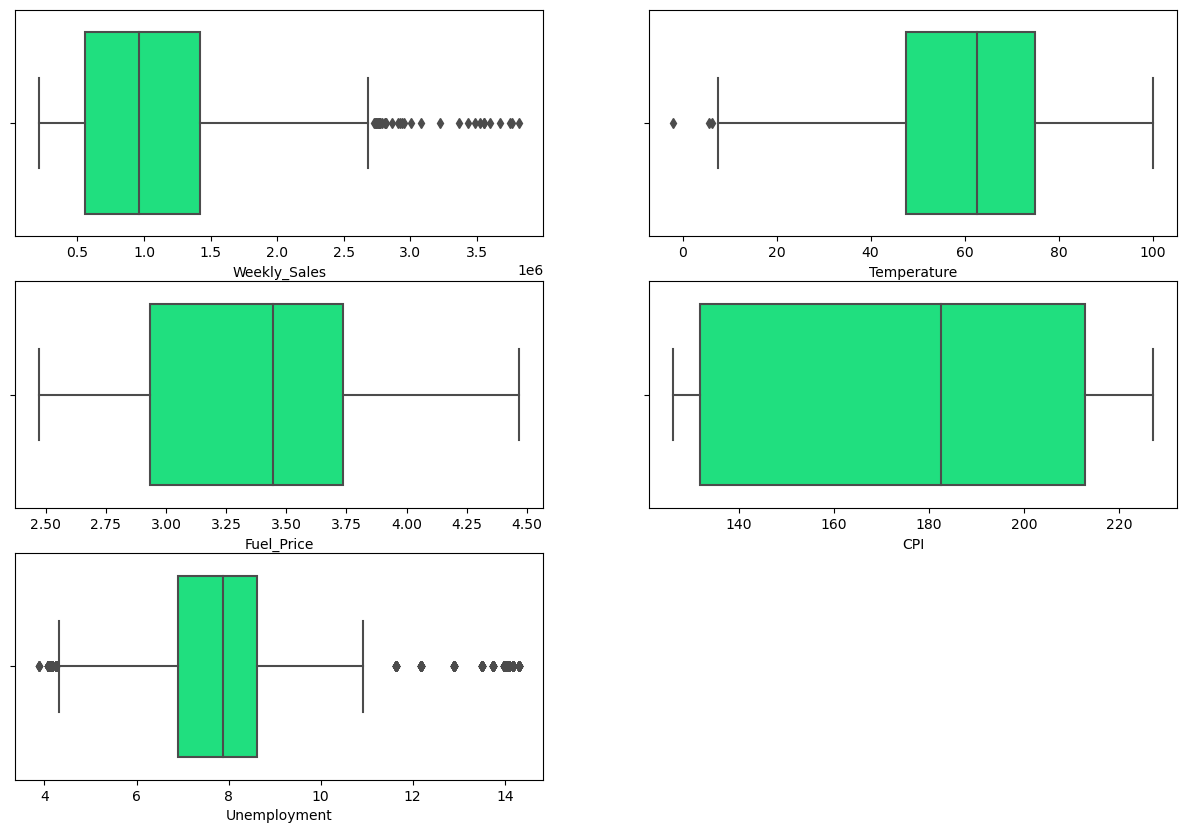

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sbp = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if sbp<=5:
            plt.subplot(3,2,sbp);
            sbp+=1
            sns.boxplot(df[i], color='springgreen');
            plt.xlabel(i);

Dari data di atas terdapat 3 data yang memiliki outlier. Data yang memiliki outlier adalah data pada kolom Weekly_Sales, Temperature dan Unemployment. Tetapi data dari outlier sebaiknya diihilangkan agar tidak terjadi bias.

In [36]:
def outlier_treatment():
    out_lier = ["Weekly_Sales","Temperature","CPI","Unemployment"]
    for i in out_lier:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1] - x[0]
        upper_limit = x[1]+1.5*iqr
        lower_limit = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>upper_limit,upper_limit,(np.where(df[i]<lower_limit,lower_limit,df[i])))
        
outlier_treatment()

Setelah melakukan treatment pada outlier dengan metode Inter Quantile Range cek kembali data apakah outlier masih ada atau sudah dihilangkan.

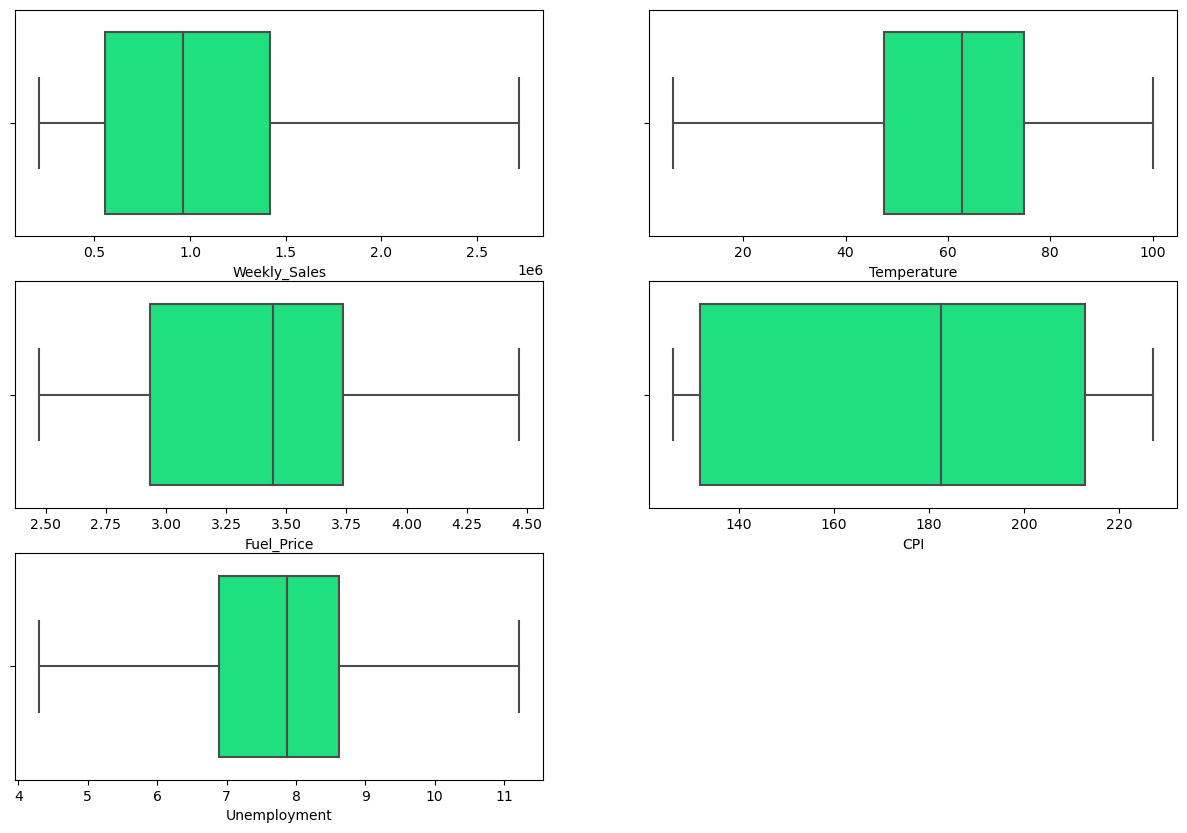

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sbp = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if sbp<=5:
            plt.subplot(3,2,sbp);
            sbp+=1
            sns.boxplot(df[i], color='springgreen');
            plt.xlabel(i);

Terlihat pada data di atas, extrime value atau outlier pada kolom Weekly_Sales, Temperature, dan Unemployment sudah hilang.

# Data Manipulation

#### Train Test Split

In [38]:
df_copy = df_one_hot.copy()
df_copy.drop(['Date', 'Unemployment'], axis=1, inplace=True)
df_copy.head()

Weekly_Sales  Temperature  Fuel_Price         CPI  date  year  Store_1  \
0    1643690.90        42.31       2.572  211.096358     2  2010        1   
1    1641957.44        38.51       2.548  211.242170     2  2010        1   
2    1611968.17        39.93       2.514  211.289143    19  2010        1   
3    1409727.59        46.63       2.561  211.319643    26  2010        1   
4    1554806.68        46.50       2.625  211.350143     3  2010        1   

   Store_2  Store_3  Store_4  ...  month_December  month_February  \
0        0        0        0  ...               0               0   
1        0        0        0  ...               1               0   
2        0        0        0  ...               0               1   
3        0        0        0  ...               0               1   
4        0        0        0  ...               0               0   

   month_January  month_July  month_June  month_March  month_May  \
0              0           0           0            0          1   
1              0           0           0            0          0   
2              0           0           0            0          0   
3              0           0           0            0          0   
4              0           0           0            0          1   

   month_November  month_October  month_September  
0               0              0                0  
1               0              0                0  
2               0              0                0  
3               0              0                0  
4               0              0                0  

[5 rows x 72 columns]

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Weekly_Sales     6435 non-null   float64
 1   Temperature      6435 non-null   float64
 2   Fuel_Price       6435 non-null   float64
 3   CPI              6435 non-null   float64
 4   date             6435 non-null   int64  
 5   year             6435 non-null   int64  
 6   Store_1          6435 non-null   uint8  
 7   Store_2          6435 non-null   uint8  
 8   Store_3          6435 non-null   uint8  
 9   Store_4          6435 non-null   uint8  
 10  Store_5          6435 non-null   uint8  
 11  Store_6          6435 non-null   uint8  
 12  Store_7          6435 non-null   uint8  
 13  Store_8          6435 non-null   uint8  
 14  Store_9          6435 non-null   uint8  
 15  Store_10         6435 non-null   uint8  
 16  Store_11         6435 non-null   uint8  
 17  Store_12      

In [40]:
X = df_copy.drop('Weekly_Sales', axis=1)
y = df_copy['Weekly_Sales']

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(X_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


Temperature    Fuel_Price           CPI          date          year  \
count  5.148000e+03  5.148000e+03  5.148000e+03  5.148000e+03  5.148000e+03   
mean  -2.087599e-17 -1.423363e-17  2.227779e-17  4.648574e-17 -1.973730e-16   
std    1.000097e+00  1.000097e+00  1.000097e+00  1.000097e+00  1.000097e+00   
min   -3.383201e+00 -1.951693e+00 -1.158416e+00 -1.682506e+00 -1.225760e+00   
25%   -7.137958e-01 -9.315360e-01 -1.011950e+00 -8.828805e-01 -1.225760e+00   
50%    1.133895e-01  2.090252e-01  2.862967e-01  3.097671e-02  3.250770e-02   
75%    7.716731e-01  8.198055e-01  1.040107e+00  8.306018e-01  1.290776e+00   
max    2.149413e+00  2.417905e+00  1.418483e+00  1.744459e+00  1.290776e+00   

            Store_1       Store_2       Store_3       Store_4       Store_5  \
count  5.148000e+03  5.148000e+03  5.148000e+03  5.148000e+03  5.148000e+03   
mean  -4.505698e-16 -1.126829e-15  5.458920e-16 -1.614978e-16 -8.002750e-16   
std    1.000097e+00  1.000097e+00  1.000097e+00  1.000097e+00  1.000097e+00   
min   -1.456913e-01 -1.470757e-01 -1.463850e-01 -1.484484e-01 -1.498095e-01   
25%   -1.456913e-01 -1.470757e-01 -1.463850e-01 -1.484484e-01 -1.498095e-01   
50%   -1.456913e-01 -1.470757e-01 -1.463850e-01 -1.484484e-01 -1.498095e-01   
75%   -1.456913e-01 -1.470757e-01 -1.463850e-01 -1.484484e-01 -1.498095e-01   
max    6.863829e+00  6.799217e+00  6.831301e+00  6.736348e+00  6.675142e+00   

       ...  month_December  month_February  month_January    month_July  \
count  ...    5.148000e+03    5.148000e+03   5.148000e+03  5.148000e+03   
mean   ...   -8.285158e-16   -1.004290e-15   1.620908e-16 -6.759680e-16   
std    ...    1.000097e+00    1.000097e+00   1.000097e+00  1.000097e+00   
min    ...   -2.851060e-01   -2.843087e-01  -2.774661e-01 -3.165993e-01   
25%    ...   -2.851060e-01   -2.843087e-01  -2.774661e-01 -3.165993e-01   
50%    ...   -2.851060e-01   -2.843087e-01  -2.774661e-01 -3.165993e-01   
75%    ...   -2.851060e-01   -2.843087e-01  -2.774661e-01 -3.165993e-01   
max    ...    3.507467e+00    3.517304e+00   3.604044e+00  3.158567e+00   

         month_June   month_March     month_May  month_November  \
count  5.148000e+03  5.148000e+03  5.148000e+03    5.148000e+03   
mean  -1.106794e-15  9.042452e-16 -3.451655e-16   -8.740311e-16   
std    1.000097e+00  1.000097e+00  1.000097e+00    1.000097e+00   
min   -3.022774e-01 -3.106213e-01 -3.124973e-01   -2.570199e-01   
25%   -3.022774e-01 -3.106213e-01 -3.124973e-01   -2.570199e-01   
50%   -3.022774e-01 -3.106213e-01 -3.124973e-01   -2.570199e-01   
75%   -3.022774e-01 -3.106213e-01 -3.124973e-01   -2.570199e-01   
max    3.308219e+00  3.219354e+00  3.200027e+00    3.890749e+00   

       month_October  month_September  
count   5.148000e+03     5.148000e+03  
mean   -2.346608e-16    -1.728717e-15  
std     1.000097e+00     1.000097e+00  
min    -3.165993e-01    -3.162278e-01  
25%    -3.165993e-01    -3.162278e-01  
50%    -3.165993e-01    -3.162278e-01  
75%    -3.165993e-01    -3.162278e-01  
max     3.158567e+00     3.162278e+00  

[8 rows x 71 columns]


                                          Standardardization on Testing set                                          


Temperature   Fuel_Price          CPI         date         year  \
count  1287.000000  1287.000000  1287.000000  1287.000000  1287.000000   
mean      0.061808    -0.053766     0.004470    -0.044823    -0.057438   
std       0.991029     1.023029     1.012268     0.999084     1.012944   
min      -2.971774    -1.861936    -1.158416    -1.682506    -1.225760   
25%      -0.676984    -1.008157    -1.027771    -0.882881    -1.225760   
50%       0.157780     0.038269     0.267528    -0.083255     0.032508   
75%       0.835282     0.786968     1.071868     0.830602     1.290776   
max       2.145624     2.417905     1.410617     1.744459     1.290776   

           Store_1      Store_2      Store_3      Store_4      Store_5  ...  \
count  1287.000000  1287.000000  1287.000000  1287.000000  1287.000000  ...   
mean      0.050379     0.036432     0.043373     0.022735     0.009280  ...   
std       1.156268     1.114444     1.135371     1.072453     1.030192  ...   
min      -0.145691    -0.147076    -0.146385    -0.148448    -0.149810  ...   
25%      -0.145691    -0.147076    -0.146385    -0.148448    -0.149810  ...   
50%      -0.145691    -0.147076    -0.146385    -0.148448    -0.149810  ...   
75%      -0.145691    -0.147076    -0.146385    -0.148448    -0.149810  ...   
max       6.863829     6.799217     6.831301     6.736348     6.675142  ...   

       month_December  month_February  month_January   month_July  \
count     1287.000000     1287.000000    1287.000000  1287.000000   
mean         0.033152        0.040616      -0.030159    -0.003375   
std          1.051945        1.063268       0.948400     0.995573   
min         -0.285106       -0.284309      -0.277466    -0.316599   
25%         -0.285106       -0.284309      -0.277466    -0.316599   
50%         -0.285106       -0.284309      -0.277466    -0.316599   
75%         -0.285106       -0.284309      -0.277466    -0.316599   
max          3.507467        3.517304       3.604044     3.158567   

        month_June  month_March    month_May  month_November  month_October  \
count  1287.000000  1287.000000  1287.000000     1287.000000    1287.000000   
mean      0.003507    -0.071998     0.034115        0.020143      -0.003375   
std       1.005641     0.886568     1.047950        1.036157       0.995573   
min      -0.302277    -0.310621    -0.312497       -0.257020      -0.316599   
25%      -0.302277    -0.310621    -0.312497       -0.257020      -0.316599   
50%      -0.302277    -0.310621    -0.312497       -0.257020      -0.316599   
75%      -0.302277    -0.310621    -0.312497       -0.257020      -0.316599   
max       3.308219     3.219354     3.200027        3.890749       3.158567   

       month_September  
count     1.287000e+03  
mean     -2.324826e-16  
std       1.000389e+00  
min      -3.162278e-01  
25%      -3.162278e-01  
50%      -3.162278e-01  
75%      -3.162278e-01  
max       3.162278e+00  

[8 rows x 71 columns]

Data dibagi menjadi 80% data training dan  20% data testing

### Seleksi Feature

### HEATMAP

                                       Correlation Matrix                                       


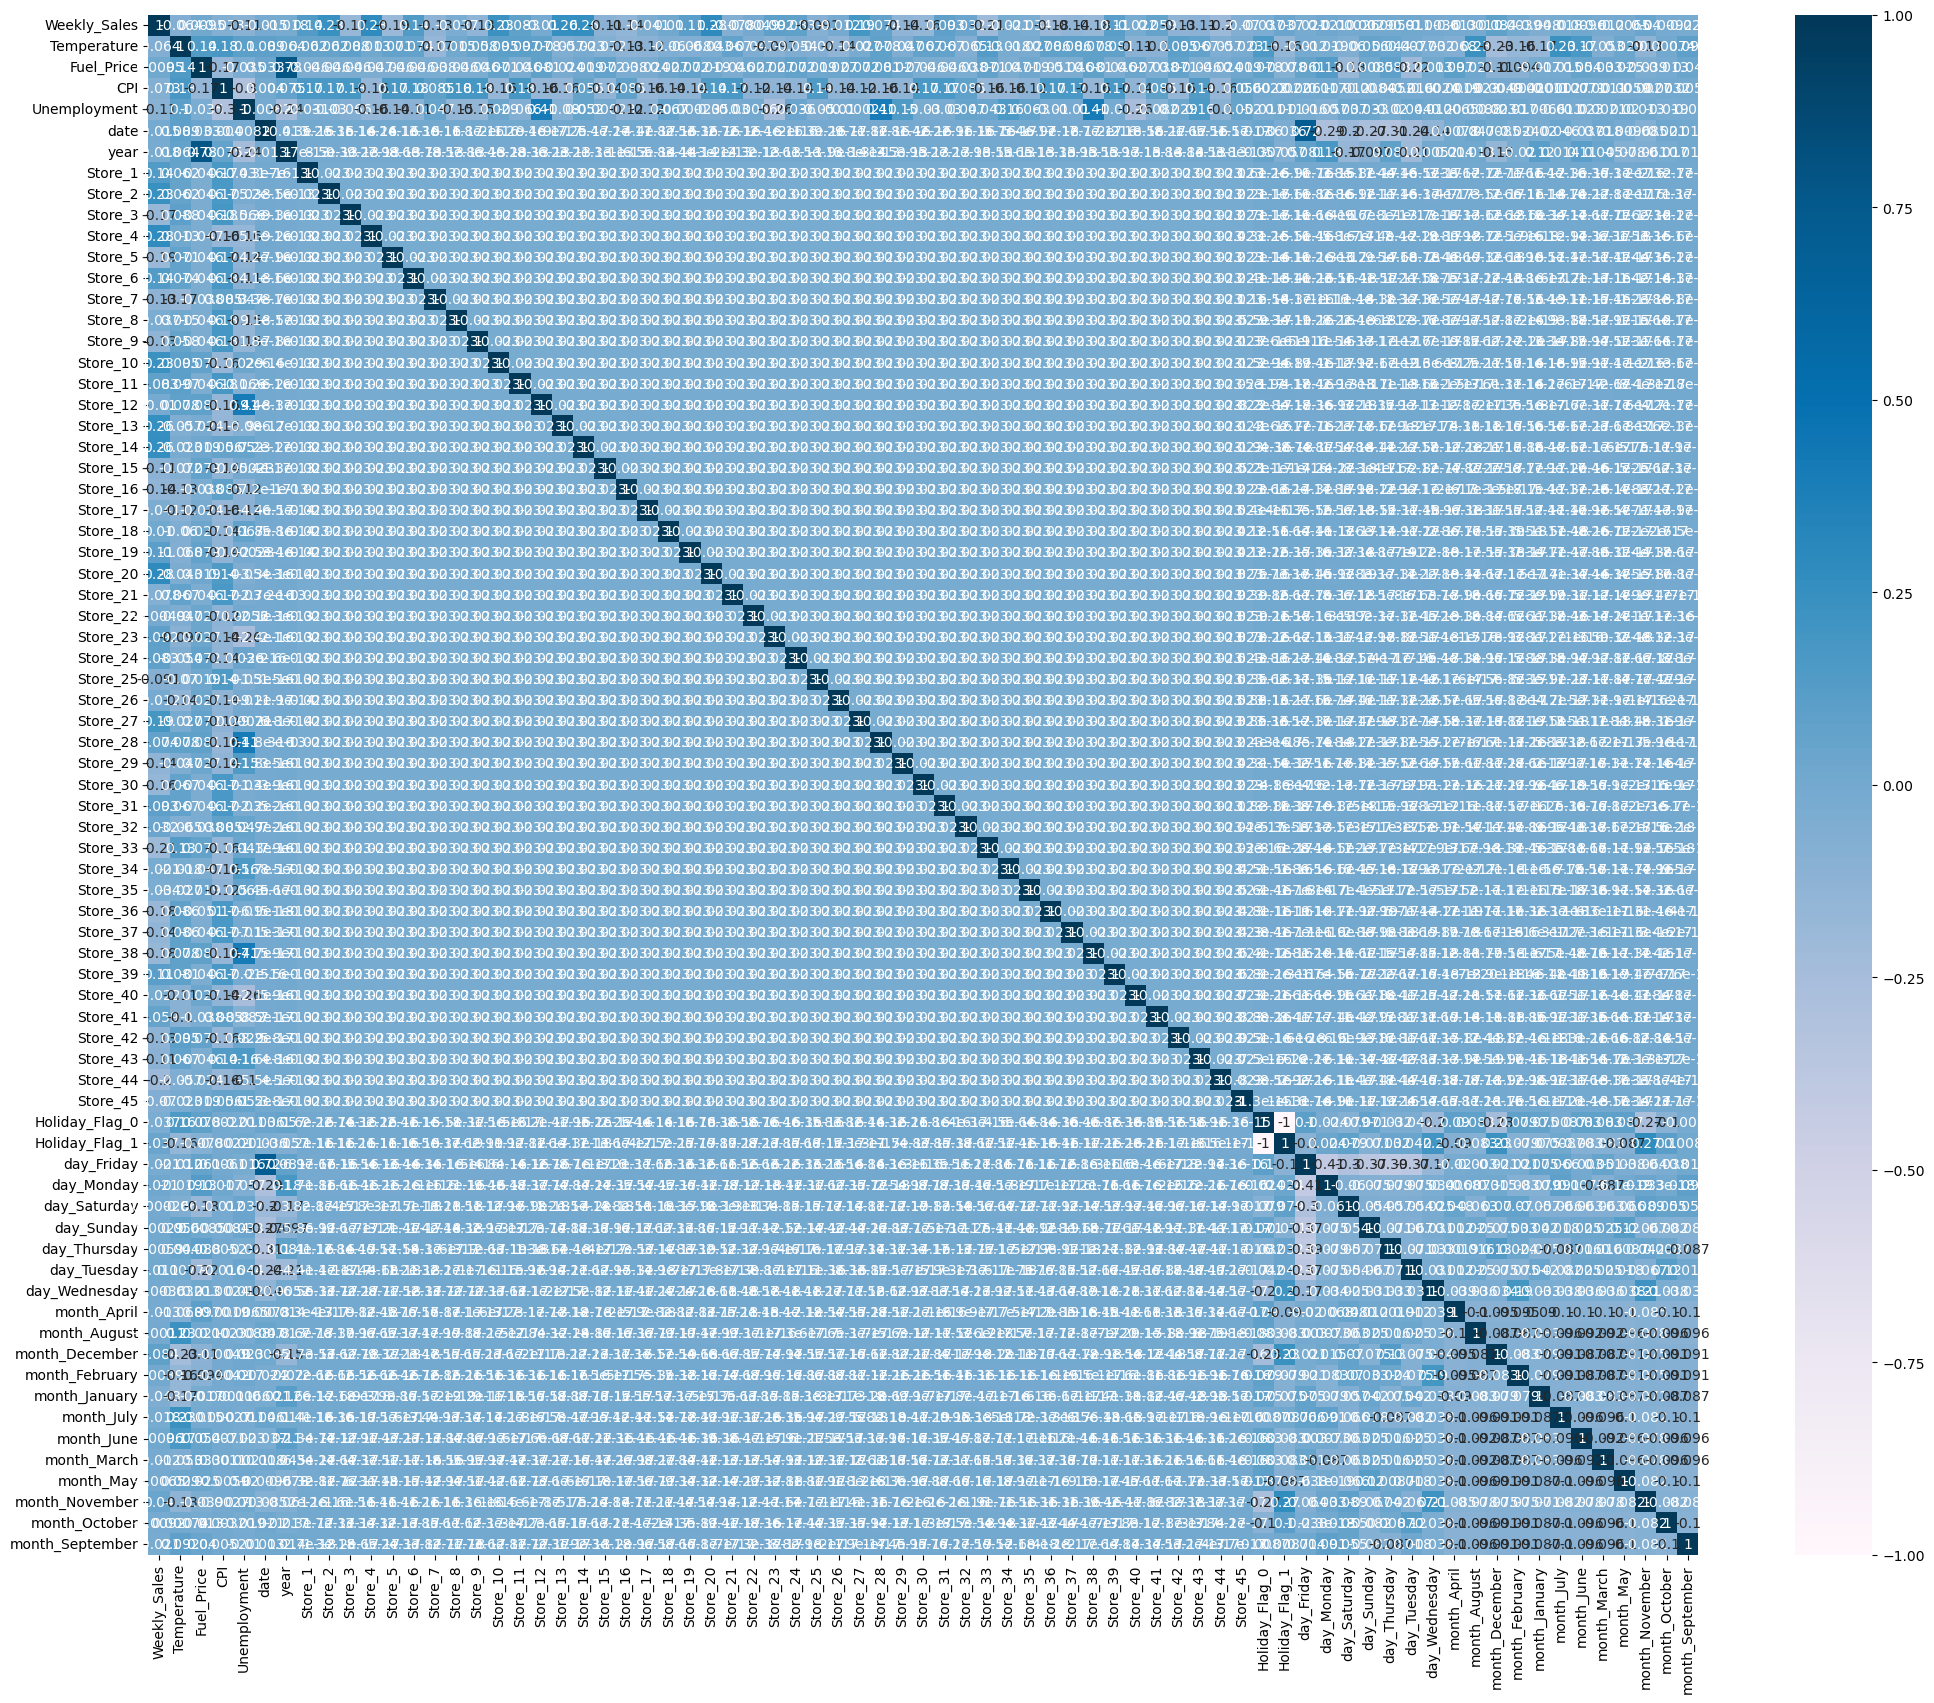

In [52]:
df = df_one_hot.copy()
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='PuBu')
plt.show()

In [54]:
df.corr()

Weekly_Sales  Temperature  Fuel_Price       CPI  \
Weekly_Sales         1.000000    -0.063810    0.009464 -0.072634   
Temperature         -0.063810     1.000000    0.144982  0.176888   
Fuel_Price           0.009464     0.144982    1.000000 -0.170642   
CPI                 -0.072634     0.176888   -0.170642  1.000000   
Unemployment        -0.106176     0.101158   -0.034684 -0.302020   
...                       ...          ...         ...       ...   
month_March         -0.011794    -0.053324    0.033397  0.001072   
month_May           -0.006492     0.029112    0.024898 -0.005887   
month_November       0.039856    -0.125490   -0.039495 -0.002732   
month_October       -0.009153     0.000743   -0.012695  0.003248   
month_September     -0.021018     0.091857    0.040055  0.005160   

                 Unemployment      date      year       Store_1       Store_2  \
Weekly_Sales        -0.106176 -0.014873 -0.018378  1.357894e-01  2.347629e-01   
Temperature          0.101158  0.089019  0.064269  6.247327e-02  6.173419e-02   
Fuel_Price          -0.034684  0.032532  0.779470 -4.562490e-02 -4.562490e-02   
CPI                 -0.302020  0.003966  0.074796  1.701580e-01  1.688150e-01   
Unemployment         1.000000 -0.008167 -0.241813 -3.124287e-02 -3.016376e-02   
...                       ...       ...       ...           ...           ...   
month_March          0.002096  0.017853  0.044926 -6.288665e-17 -4.249526e-17   
month_May            0.020214 -0.009600 -0.077694 -6.339886e-17 -2.782845e-17   
month_November       0.013364 -0.085049 -0.060894  1.982264e-16  1.987479e-16   
month_October       -0.018718  0.020969 -0.016649  2.286329e-17  1.708703e-17   
month_September     -0.010258  0.012632  0.013874 -2.722728e-18  1.250038e-18   

                      Store_3  ...  month_December  month_February  \
Weekly_Sales    -1.721106e-01  ...        0.083530        0.003904   
Temperature      8.803649e-02  ...       -0.227094       -0.163652   
Fuel_Price      -4.562490e-02  ...       -0.114997       -0.094248   
CPI              1.831622e-01  ...       -0.004922       -0.004208   
Unemployment    -6.607851e-02  ...        0.022567        0.016556   
...                       ...  ...             ...             ...   
month_March     -4.587239e-17  ...       -0.087370       -0.087370   
month_May       -1.724289e-17  ...       -0.091287       -0.091287   
month_November   1.647698e-16  ...       -0.074813       -0.074813   
month_October    2.319408e-17  ...       -0.091287       -0.091287   
month_September -2.195677e-17  ...       -0.091287       -0.091287   

                 month_January  month_July  month_June  month_March  \
Weekly_Sales         -0.048275   -0.018354    0.009591    -0.011794   
Temperature          -0.166359    0.228759    0.170995    -0.053324   
Fuel_Price           -0.016847   -0.015038    0.054465     0.033397   
CPI                  -0.000111    0.000266    0.007131     0.001072   
Unemployment         -0.006585   -0.011260   -0.022746     0.002096   
...                        ...         ...         ...          ...   
month_March          -0.082991   -0.095709   -0.091603     1.000000   
month_May            -0.086711   -0.100000   -0.095709    -0.095709   
month_November       -0.071063   -0.081954   -0.078438    -0.078438   
month_October        -0.086711   -0.100000   -0.095709    -0.095709   
month_September      -0.086711   -0.100000   -0.095709    -0.095709   

                 month_May  month_November  month_October  month_September  
Weekly_Sales     -0.006492        0.039856      -0.009153        -0.021018  
Temperature       0.029112       -0.125490       0.000743         0.091857  
Fuel_Price        0.024898       -0.039495      -0.012695         0.040055  
CPI              -0.005887       -0.002732       0.003248         0.005160  
Unemployment      0.020214        0.013364      -0.018718        -0.010258  
...                    ...             ...            ...              

### VIF

c:\Users\WIN-10\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\WIN-10\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\WIN-10\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\WIN-10\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropped Features -->  ['Store_31', 'month_September', 'day_Sunday', 'Holiday_Flag_1', 'CPI', 'day_Friday', 'Fuel_Price', 'Temperature', 'Store_7', 'month_April', 'date', 'Store_32', 'month_December', 'Store_43', 'month_November', 'Store_13', 'month_March', 'Store_29', 'year', 'month_February', 'Store_34', 'Store_39', 'month_July', 'Store_27', 'Holiday_Flag_0', 'Store_15', 'month_October', 'Store_11', 'Store_26', 'Store_17', 'Store_1', 'Store_30', 'month_January', 'Store_2', 'Store_3', 'Store_16', 'Store_4', 'Store_5', 'Store_6', 'month_May', 'Store_41', 'Store_8', 'Store_9', 'Store_10', 'Store_12', 'Store_14', 'month_June', 'day_Tuesday', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_28', 'Store_33', 'day_Monday', 'day_Saturday']


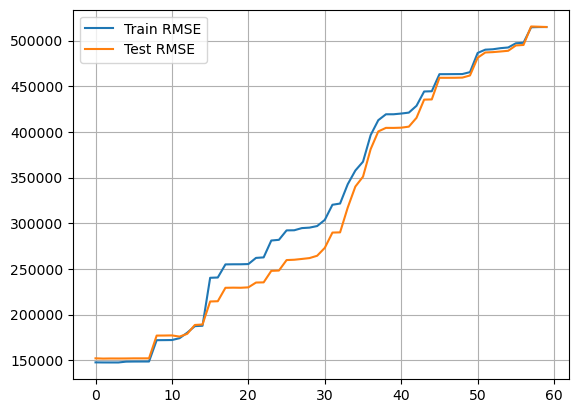

In [44]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), y_train)
        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
        Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

print('Dropped Features --> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

### PCA

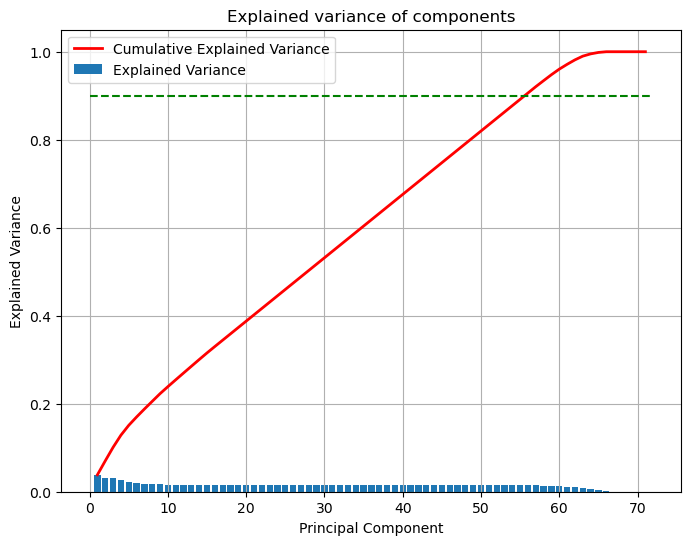

In [45]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

## Data Model

In [46]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [47]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    regressor_rmses = dict(zip(regressor_names, rmses))
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    df = df.reset_index()
    df.columns = ['regressor_name', 'rmse']
    return df.sort_values('rmse', ignore_index=True)

In [48]:
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [49]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]

In [50]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors and their RMSEs


c:\Users\WIN-10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.556e+13, tolerance: 1.635e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\WIN-10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


regressor_name          rmse
0         Random Forest Regression  1.336542e+05
1                 Lasso Regression  1.516929e+05
2                 Ridge Regression  1.517135e+05
3                Linear Regression  1.520143e+05
4   K-Nearest Neighbour Regression  1.559223e+05
5         Decision Tree Regression  1.835694e+05
6          Boosted Tree Regression  2.277428e+05
7           Elastic Net Regression  2.331110e+05
8        Support Vector Regression  5.755762e+05
9        Neural Network Regression  1.180117e+06
10               Spline Regression  1.540304e+06
11           Polynomial Regression  1.015163e+17

In [51]:
rmse = evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

best_rmse = rmse.iloc[0]['rmse']
median_sale = df['Weekly_Sales'].median()
percent_deviation = round((best_rmse*100/median_sale), 2)

# print the result
print('Model memiliki presentasi error sebesar {}%'.format(percent_deviation))

c:\Users\WIN-10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.556e+13, tolerance: 1.635e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\WIN-10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model memiliki presentasi error sebesar 14.17%
